<a href="https://colab.research.google.com/github/napoles-uach/FDTD/blob/master/ejercicio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

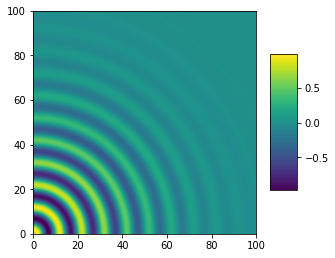

In [15]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
nx=100


#-----------------------------------
              
def z_func(i,x,y):
  r=np.sqrt(x**2+y**2)
  k=2*np.pi/10.0
  w=2*np.pi/20.0
  gauss=np.exp(-0.5*(r/35.0)**2)
  seno=np.sin(k*r-w*i)*gauss
  return (seno)            
              
 #g=1#np.exp(-0.5)
    
 
x = arange(0,nx,1)
y = arange(0,nx,1)
X,Y = meshgrid(x, y) # grid of point
#Z = z_func(X, Y) # evaluation of the function on the grid
#-----------------

fig, ax = plt.subplots(figsize=(5,5))


ax.set_xlim((0, nx))
ax.set_ylim((0, nx))

im = ax.imshow(z_func(0,X,Y),interpolation="spline16")
#-----------------------------------
def init():
    im.set_data(z_func(0,X,Y))
    return (im,)

def animate(i):
    data_slice = z_func(i,X,Y)
    im.set_data(data_slice)
    return (im,)

fig.colorbar(im, shrink=0.5, aspect=5)
 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=40, blit=True)
rc('animation', html='jshtml')
anim
#HTML(anim.to_html5_video())